In [5]:
import pyswarms as ps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [17]:
df = pd.read_csv("input/cardio_train.csv",sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [18]:
print(f"Shape : {df.shape}")

Shape : (70000, 13)


In [19]:
duplicate_sum = df.duplicated().sum()
if duplicate_sum:
    print('Duplicates Rows in Dataset are : {}'.format(duplicate_sum))
else:
    print('Dataset contains no Duplicate Values')

Dataset contains no Duplicate Values


In [20]:
# Seeking to outlier then destroy it!!!
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))

outliers(df[['height', 'weight']])

For the feature height, No of Outliers is 519
For the feature weight, No of Outliers is 1819


In [21]:
df[['height', 'weight']] = np.log(df[['height', 'weight']])
outliers(df[['height', 'weight']])
df = df[(df['weight'] > df['weight'].quantile(0.005)) & (df['weight'] < df['weight'].quantile(0.995))]
df = df[(df['height'] > df['height'].quantile(0.005)) & (df['height'] < df['height'].quantile(0.995))]
outliers(df[['height', 'weight']])
df["height"] = np.expm1(df["height"])
df["weight"] = np.expm1(df["weight"])
df.shape

For the feature height, No of Outliers is 484
For the feature weight, No of Outliers is 1174
For the feature height, No of Outliers is 0
For the feature weight, No of Outliers is 349


(68370, 13)

In [22]:
# BMI formulation
df["bmi"] = np.round(df.weight/(df.height/100)**2,2)
print(df.shape)
df.head(3)

(68370, 14)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,18393,2,167.0,61.0,110,80,1,1,0,0,1,0,21.87
1,1,20228,1,155.0,84.0,140,90,3,1,0,0,1,1,34.96
2,2,18857,1,164.0,63.0,130,70,3,1,0,0,0,1,23.42


If your BMI is:

below 18.5 – you're in the underweight range,
between 18.5 and 24.9 – you're in the healthy weight range,
between 25 and 29.9 – you're in the overweight range,
between 30 and 39.9 – you're in the obese range

In [23]:
df.loc[(df.bmi <= 18.4), 'bmicat'] = 1
df.loc[(df.bmi > 18.4) & (df.bmi < 25), 'bmicat'] = 2
df.loc[(df.bmi >= 25) & (df.bmi < 30), 'bmicat'] = 3
df.loc[(df.bmi >= 30) & (df.bmi < 40), 'bmicat'] = 4
df.loc[(df.bmi >= 40), 'bmicat'] = 5

In [26]:
print(df.shape)
df.head(3)

(68370, 15)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmicat
0,0,18393,2,167.0,61.0,110,80,1,1,0,0,1,0,21.87,2.0
1,1,20228,1,155.0,84.0,140,90,3,1,0,0,1,1,34.96,4.0
2,2,18857,1,164.0,63.0,130,70,3,1,0,0,0,1,23.42,2.0


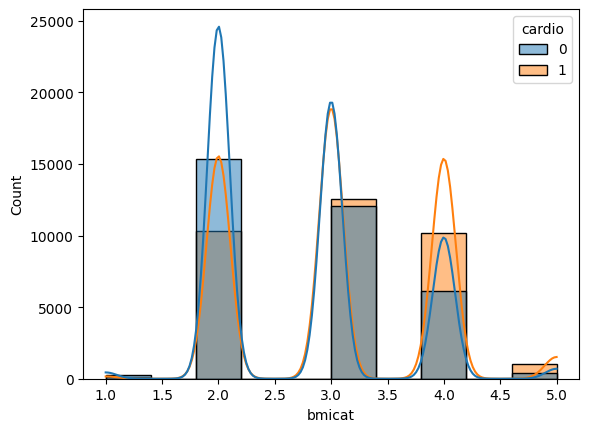

In [24]:
sns.histplot(data=df,x="bmicat",hue="cardio",kde=True,bins=10)
plt.show()

# When the BMI category increases, you can see from the histplot that the risk of cardiovascular disease also increases within the category.

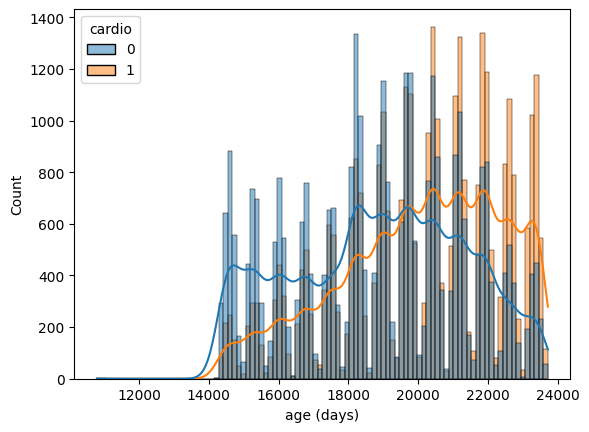

In [28]:
# I handle to age now
sns.histplot(data=df,x="age",hue="cardio",bins=100,kde=True)
plt.xlabel('age (days)')
plt.show()
# We can say with histplot; Cardiovascular diseases increases with age

In [29]:
# Finding the categorical years

df["year"] = np.round(df.age/365,2)
df.loc[(df.year <= 40), 'agecat'] = 1
df.loc[(df.year > 40)&(df.year<=45), 'agecat'] = 2
df.loc[(df.year > 40)&(df.year<=45), 'agecat'] = 3
df.loc[(df.year > 45)&(df.year<=50), 'agecat'] = 4
df.loc[(df.year > 50)&(df.year<=55), 'agecat'] = 5
df.loc[(df.year > 55)&(df.year<=60), 'agecat'] = 6
df.loc[(df.year > 60)&(df.year<=65), 'agecat'] = 7
df.loc[(df.year > 65)&(df.year<=70), 'agecat'] = 8
df.loc[(df.year >= 70), 'agecat'] = 9

In [30]:
print(df.shape)
df.head(3)

(68370, 17)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmicat,year,agecat
0,0,18393,2,167.0,61.0,110,80,1,1,0,0,1,0,21.87,2.0,50.39,5.0
1,1,20228,1,155.0,84.0,140,90,3,1,0,0,1,1,34.96,4.0,55.42,6.0
2,2,18857,1,164.0,63.0,130,70,3,1,0,0,0,1,23.42,2.0,51.66,5.0


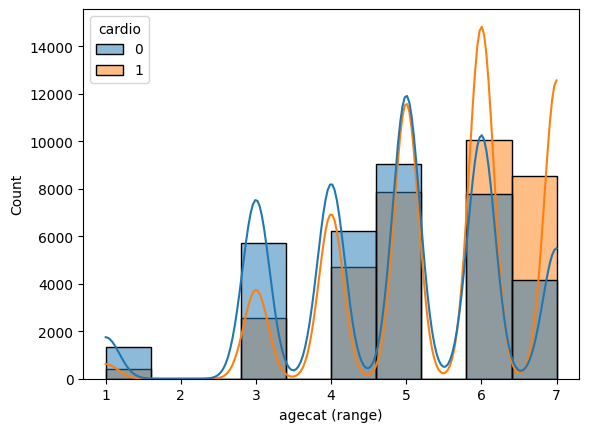

In [31]:
sns.histplot(data=df,x="agecat",hue="cardio",bins=10,kde=True)
plt.xlabel('agecat (range)')
plt.show()

# I choose the AHA 2020 hypertension guideline for the categories


2024-09-09 18:11:15,073 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-09 18:11:15,103 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-09 18:11:15,172 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-09 18:11:15,202 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


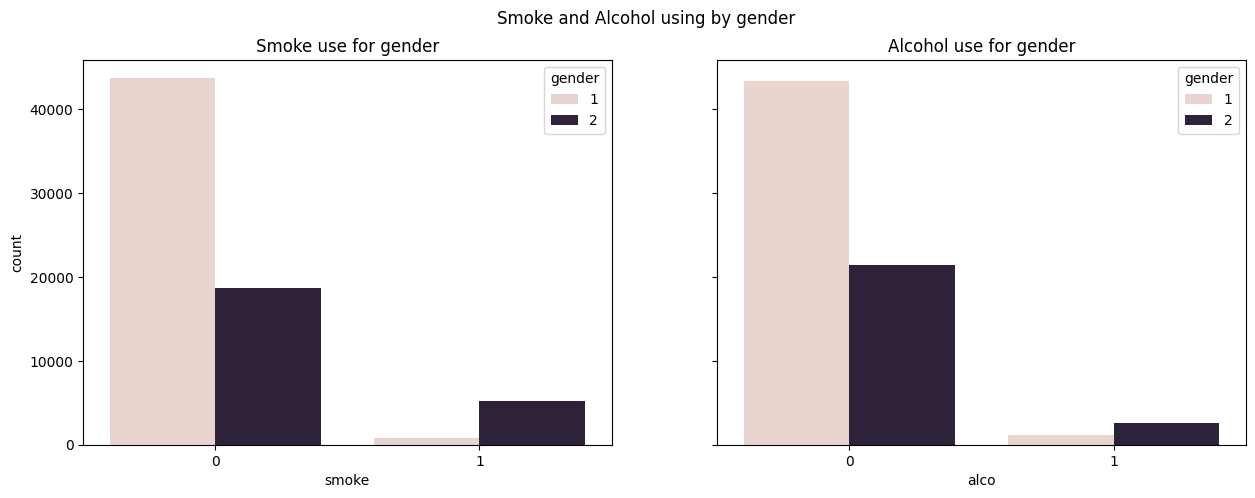

In [32]:
# We already know men have more uses smoke and alcohol rather than women
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Smoke and Alcohol using by gender')

# Bulbasaur
sns.countplot(ax=axes[0], x=df.smoke,hue=df.gender)
axes[0].set_title("Smoke use for gender")

# Charmander
sns.countplot(ax=axes[1], x=df.alco,hue=df.gender)
axes[1].set_title("Alcohol use for gender")
plt.show()
# Gender: 2 is must be men

In [33]:
df.gender.replace(1,"female",inplace=True)
df.gender.replace(2,"male",inplace=True)
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmicat,year,agecat
0,0,18393,male,167.0,61.0,110,80,1,1,0,0,1,0,21.87,2.0,50.39,5.0
1,1,20228,female,155.0,84.0,140,90,3,1,0,0,1,1,34.96,4.0,55.42,6.0
2,2,18857,female,164.0,63.0,130,70,3,1,0,0,0,1,23.42,2.0,51.66,5.0


In [34]:
# Some conditions are incompatible with normal life.

out_filter = ((df["ap_hi"]>180) | (df["ap_lo"]>150))
df = df[~out_filter]
out_filter2 = ((df["ap_hi"] < 60) | (df["ap_lo"] < 30))
df = df[~out_filter2]

# Some cases diastolic pressure is higher than systolic, it is impossible with normal physiologic condition. 
df = df[~(df['ap_lo']> df['ap_hi'])]

print(df.shape)

(66826, 17)


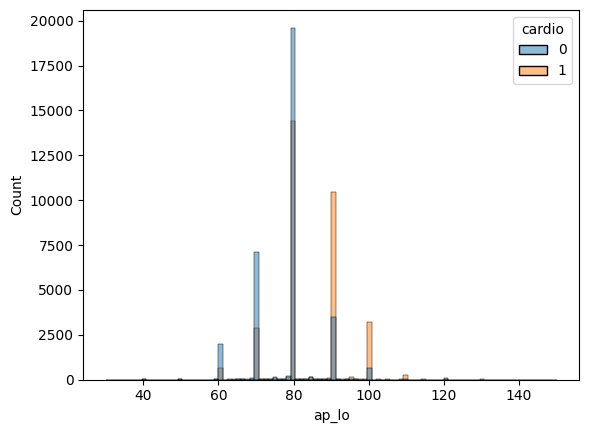

In [37]:
sns.histplot(data=df,x="ap_lo",hue="cardio",bins=100)
plt.show()

In [38]:
# Find the risk number
risk_number = []
for i in range(len(df)):
    total = []
    if df.agecat.iloc[i]>8:
        total.append(1)
    if df.gluc.iloc[i]>1:
        total.append(1)
    if df.cholesterol.iloc[i]>1:
        total.append(1)
    if df.bmicat.iloc[i]>=3:
        total.append(1)
    if df.active.iloc[i]==0:
        total.append(1)
    if df.alco.iloc[i] == 1:
        total.append(1)
    if df.smoke.iloc[i] == 1:
        total.append(1)
    risk_number.append(np.sum(total))

df["risk_number"] = risk_number

hypertension_grade = []
for i in range(len(df)):
    if df.ap_hi.iloc[i]<140 and df.ap_lo.iloc[i]<90:
        if df.risk_number.iloc[i] >=3:
            hypertension_grade.append(3)
        else:
            hypertension_grade.append(1)
    elif df.ap_hi.iloc[i]>=160 and df.ap_lo.iloc[i]>=100:
        if df.risk_number.iloc[i]>0:
            hypertension_grade.append(3)
        else:
            hypertension_grade.append(2)
    else:
        if df.risk_number.iloc[i] < 1:
            hypertension_grade.append(1)
        elif df.risk_number.iloc[i] >= 3:
            hypertension_grade.append(3)
        else:
            hypertension_grade.append(2)


df["hyper_tension_gr"] = hypertension_grade

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmicat,year,agecat,risk_number,hyper_tension_gr
0,0,18393,male,167.0,61.0,110,80,1,1,0,0,1,0,21.87,2.0,50.39,5.0,0.0,1
1,1,20228,female,155.0,84.0,140,90,3,1,0,0,1,1,34.96,4.0,55.42,6.0,2.0,2
2,2,18857,female,164.0,63.0,130,70,3,1,0,0,0,1,23.42,2.0,51.66,5.0,2.0,1
3,3,17623,male,168.0,81.0,150,100,1,1,0,0,1,1,28.70,3.0,48.28,4.0,1.0,2
4,4,17474,female,155.0,55.0,100,60,1,1,0,0,0,0,22.89,2.0,47.87,4.0,1.0,1


In [39]:
cvr=[]

# This formulations's limitation is we dont know about real cholestrol levels

for i in range(len(df)):
    if df["gender"].iloc[i] == "female":
        a=df.year.iloc[i]
        b=df.cholesterol.iloc[i]
        c=df.ap_hi.iloc[i]
        d=df.hyper_tension_gr.iloc[i] 
        e=df.smoke.iloc[i]
        f=df.gluc.iloc[i]
        if d >= 1:
            On_blood_pressure_medication = 1
        if d == 1:
            On_blood_pressure_medication = 0
        if b==1:
            totalcol=200
            hdl=40
        if b==2:
            totalcol=350
            hdl=60
        if b==3:
            totalcol=400
            hdl=80
        if f>1:
            f=1
        if On_blood_pressure_medication == 0:
            nontreated=1
        if On_blood_pressure_medication == 1:
            nontreated=0
        Risk_Factors = np.exp((np.log(a) * 2.32888) + (np.log(totalcol * 1.20904) - np.log(hdl * 0.70833) + (np.log(c)* nontreated * 2.76157)+(2.82263*On_blood_pressure_medication*np.log(c))) + (e*0.52873) + (f*0.69154) - 26.1931)    
        
        risk = (100 * (1 -(0.95012**Risk_Factors)))
        cvr.append(risk)
    
    
    if df["gender"].iloc[i] == "male":
        a=df.year.iloc[i]
        b=df.cholesterol.iloc[i]
        c=df.ap_hi.iloc[i]
        d=df.hyper_tension_gr.iloc[i] 
        e=df.smoke.iloc[i]
        f=df.gluc.iloc[i]
        if d >= 1:
            On_blood_pressure_medication = 1
        if d == 1:
            On_blood_pressure_medication = 0
        if b==1:
            totalcol=200
            hdl=40
        if b==2:
            totalcol=300
            hdl=60
        if b==3:
            totalcol=400
            hdl=80
        if f>1:
            f=1
        if On_blood_pressure_medication == 0:
            nontreated=1
        if On_blood_pressure_medication == 1:
            nontreated=0
        Risk_Factors = np.exp((np.log(a) * 3.06117) + (np.log(totalcol) * 1.12370) - (np.log(hdl)* 0.93262) + ((np.log(c)* nontreated * 1.93303)+(1.99881*On_blood_pressure_medication*np.log(c))) + (e*0.65451) + (f*0.57367)-23.9802)
        risk = (100 * (1 -(0.88936**Risk_Factors)))
        cvr.append(risk)
    #print(a,b,c,d,e,f,nontreated,On_blood_pressure_medication,totalcol,hdl)

df["Risk_score"]=cvr

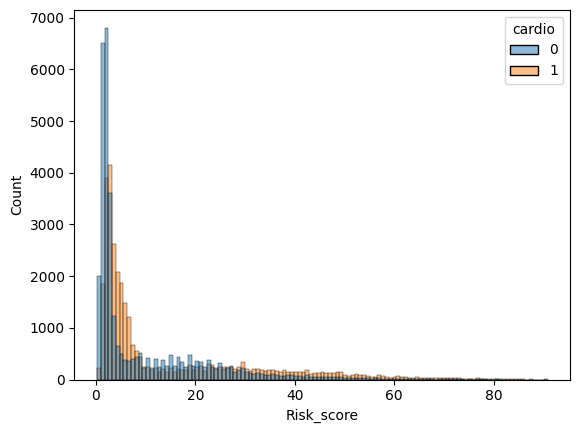

In [40]:
sns.histplot(data=df,x=df.Risk_score,hue=df.cardio)
plt.show()

In [41]:
print(df.shape)
df.head()

(66826, 20)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmicat,year,agecat,risk_number,hyper_tension_gr,Risk_score
0,0,18393,male,167.0,61.0,110,80,1,1,0,0,1,0,21.87,2.0,50.39,5.0,0.0,1,13.246457
1,1,20228,female,155.0,84.0,140,90,3,1,0,0,1,1,34.96,4.0,55.42,6.0,2.0,2,4.710407
2,2,18857,female,164.0,63.0,130,70,3,1,0,0,0,1,23.42,2.0,51.66,5.0,2.0,1,2.438717
3,3,17623,male,168.0,81.0,150,100,1,1,0,0,1,1,28.70,3.0,48.28,4.0,1.0,2,27.070496
4,4,17474,female,155.0,55.0,100,60,1,1,0,0,0,0,22.89,2.0,47.87,4.0,1.0,1,0.996806


In [42]:
# Let's the drop dependent columns;
df.drop(columns=["id","age","height","weight","ap_hi","ap_lo","bmi","year","Risk_score","risk_number"],inplace=True)
df.head(3)

,gender,cholesterol,gluc,smoke,alco,active,cardio,bmicat,agecat,hyper_tension_gr
0,male,1,1,0,0,1,0,2.0,5.0,1
1,female,3,1,0,0,1,1,4.0,6.0,2
2,female,3,1,0,0,0,1,2.0,5.0,1


In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.gender = le.fit_transform(df.gender)
df.head(3)

,gender,cholesterol,gluc,smoke,alco,active,cardio,bmicat,agecat,hyper_tension_gr
0,1,1,1,0,0,1,0,2.0,5.0,1
1,0,3,1,0,0,1,1,4.0,6.0,2
2,0,3,1,0,0,0,1,2.0,5.0,1


In [45]:
X = df.copy()
y = X.cardio
X.drop(columns="cardio",inplace=True)
X.shape,y.shape

((66826, 9), (66826,))

In [46]:
from sklearn.model_selection import StratifiedKFold, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=42)
#train = pd.concat([X_train,y_train],axis=1)
#test = pd.concat([X_test,y_test],axis=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46778, 9), (20048, 9), (46778,), (20048,))

In [47]:
X_train = X_train.values
y_train = y_train.values
X_train.shape,y_train.shape

((46778, 9), (46778,))

# Particles Swarm Optimization in Case

In [58]:
n_inputs = X_train.shape[1]
n_hidden = 20
n_classes = 2
num_samples = len(X_train)
iteration = 1000

In [59]:
a = n_inputs*n_hidden
b = a+n_hidden
c = b+(n_hidden*n_classes)
d = c+n_classes

In [60]:
def logits_function(p):
    """ Calculate roll-back the weights and biases

    Inputs
    ------
    p: np.ndarray
        The dimensions should include an unrolled version of the
        weights and biases.

    Returns
    -------
    numpy.ndarray of logits for layer 2

    """
    # Roll-back the weights and biases
    W1 = p[0:a].reshape((n_inputs,n_hidden))
    b1 = p[a:b].reshape((n_hidden,))
    W2 = p[b:c].reshape((n_hidden,n_classes))
    b2 = p[c:d].reshape((n_classes,))

    # Perform forward propagation
    z1 = X_train.dot(W1) + b1  # Pre-activation in Layer 1
    a1 = np.tanh(z1)     # Activation in Layer 1
    logits = a1.dot(W2) + b2 # Pre-activation in Layer 2
    return logits          # Logits for Layer 2


In [61]:
# Forward propagation
def forward_prop(params):
    """Forward propagation as objective function

    This computes for the forward propagation of the neural network, as
    well as the loss.

    Inputs
    ------
    params: np.ndarray
        The dimensions should include an unrolled version of the
        weights and biases.

    Returns
    -------
    float
        The computed negative log-likelihood loss given the parameters
    """

    logits = logits_function(params)

    # Compute for the softmax of the logits
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute for the negative log likelihood

    corect_logprobs = -np.log(probs[range(num_samples), y_train])
    loss = np.sum(corect_logprobs) / num_samples

    return loss

In [62]:
def f(x):
    """Higher-level method to do forward_prop in the
    whole swarm.

    Inputs
    ------
    x: numpy.ndarray of shape (n_particles, dimensions)
        The swarm that will perform the search

    Returns
    -------
    numpy.ndarray of shape (n_particles, )
        The computed loss for each particle
    """
    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    return np.array(j)

In [63]:
%%time
# Initialize swarm
options = {'c1': 0.8, 'c2': 0.6, 'w':0.9}

# Call instance of PSO
dimensions = (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=iteration)

2024-09-09 19:45:46,480 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.8, 'c2': 0.6, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0.59
2024-09-09 20:24:42,982 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.5896996090639065, best pos: [ 3.83826618e+00  2.63907388e+00  3.31387351e-01  8.88957852e-01
 -4.93286849e-02 -3.10857844e-02 -5.57041572e-01  1.43780479e+00
 -6.73260616e-01  1.77743672e-01  1.67787148e+00  3.07601378e-01
  4.83962015e-01  4.04901608e+00  9.12655774e-01  1.52378566e+00
  9.15786865e-01  3.94742181e+00 -1.12046999e-01 -6.76585826e-02
 -8.82165699e-01 -3.67475887e-01  1.07884069e+00  3.56774449e-01
 -5.00288516e-01  9.52816438e-01  1.28422757e+00  1.70503446e+00
  5.15666181e-01  2.07966469e+00 -2.66574123e-01  9.46071089e-01
  1.00856481e+00  6.60651605e-01  8.26932077e-01  2.88507408e-01
  1.56738764e+00  1.36164552e+00  1.34778089e-01 -1.01997152e+00
  3.58737620e-01 -8.096669

CPU times: total: 11min 22s
Wall time: 38min 56s


In [64]:
def predict(pos):
    """
    Use the trained weights to perform class predictions.

    Inputs
    ------
    pos: numpy.ndarray
        Position matrix found by the swarm. Will be rolled
        into weights and biases.
    """
    logits = logits_function(pos)
    y_pred = np.argmax(logits, axis=1)
    return y_pred

In [65]:
(predict(pos) == y_train).mean()

np.float64(0.6992175809141049)

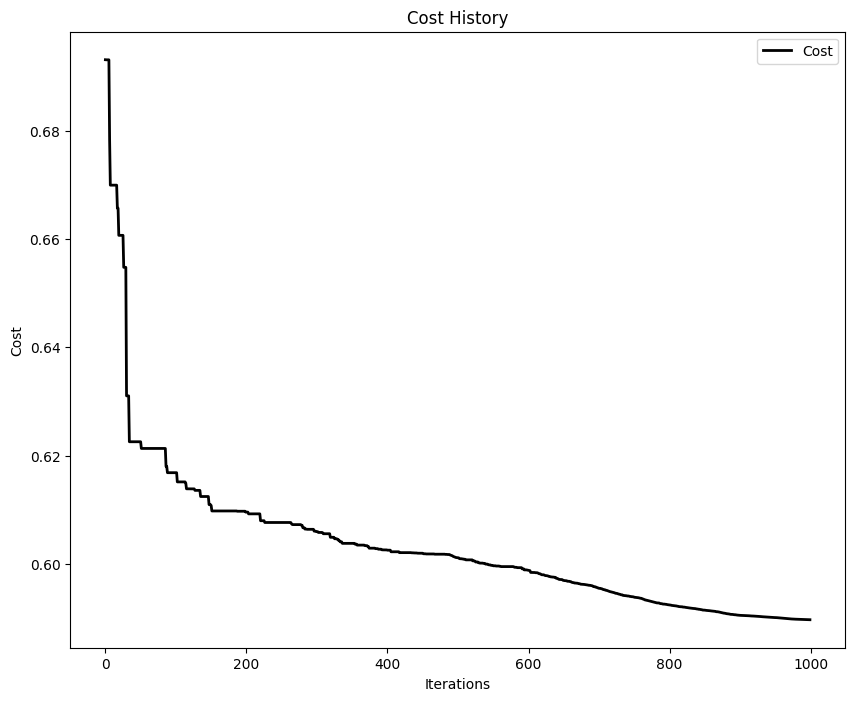

In [66]:
from pyswarms.utils.plotters.formatters import Mesher
from pyswarms.utils.plotters import (plot_cost_history, plot_contour, plot_surface)
import matplotlib.pyplot as plt
plot_cost_history(cost_history=optimizer.cost_history)
plt.show()